In [5]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime,date
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("outputdf.csv")
data.shape

(954, 14)

In [7]:
data.columns

Index(['ES_POPCORN SMALL', 'ES_POPCORN REGULAR', 'ES_COLD COFFEE',
       'ES_LONE RANGER', 'ES_VEG PUFF', 'ES_CREAM DONUT', 'ES_POPCORN LARGE',
       'ES_CAPPUCCINO PREMIUM', 'ES_FRENCH FRIES', 'ES_BHEL PURI',
       'ES_TWO TO TANGO', 'ES_COKE 450 ML', 'ES_COKE 650 ML',
       'ES_NACHOS/SALSA'],
      dtype='object')

In [4]:
changepoints = [0, 20, 41, 61, 81, 102, 122, 142, 163, 183, 203, 224, 244, 264, 284, 305, 325, 345, 366, 386, 406, 427, 447, 467, 488, 508, 611]

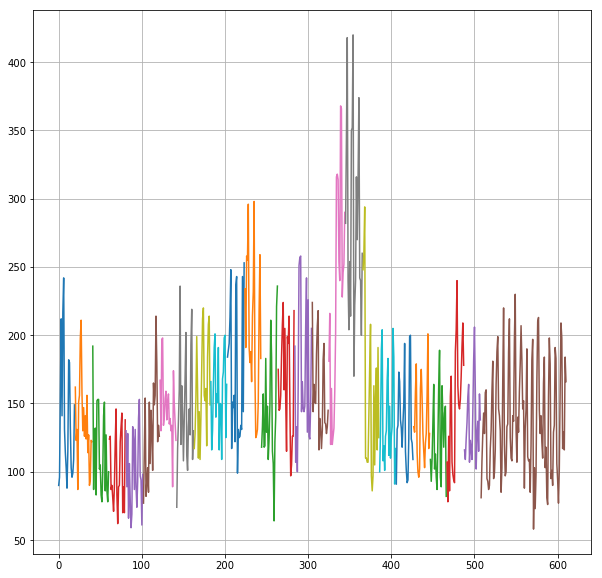

In [8]:
plt.figure(figsize=(10,10))
plt.grid(True)
tempData = data['ES_CAPPUCCINO PREMIUM']
for i in range(1,len(changepoints)):
    plt.plot(tempData[changepoints[i-1]:changepoints[i]])

In [57]:
mvgAvg = pd.ewma(tempData,halflife=0.6)
pd.concat([mvgAvg,tempData],axis=1)

/home/divi/.local/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=0.6,min_periods=0,adjust=True,ignore_na=False).mean()
  if __name__ == '__main__':


,ES_CAPPUCCINO PREMIUM,ES_CAPPUCCINO PREMIUM
0,90.000000,90
1,94.562806,96
2,138.006099,156
3,189.197263,212
4,156.078505,141
5,197.851726,217
6,228.103470,242
7,161.579231,131
8,128.985524,114
9,111.184756,103


In [67]:
k=14
gradList = []
for i in range(0,len(mvgAvg)-k):
    s,_,_,_,_ = stats.linregress(x=list(range(k)), y=mvgAvg[i:i+k])
    gradList.append(s)
gradList

[0.82241568740512894,
 -0.97894916102478213,
 -3.7108073781365118,
 -5.5070278088161313,
 -5.5266856344518418,
 -6.0719693702307813,
 -4.1829889702599088,
 -0.5043564292653514,
 0.70836063691458873,
 0.94126674640766017,
 -0.29519518698436364,
 -1.0324370403379832,
 -1.0945275914008727,
 1.2676764734649717,
 4.5545776610418978,
 5.9406769647910203,
 5.4272764743945903,
 4.4089143956011565,
 2.7346718823244305,
 1.2919515022044834,
 0.3964004580649122,
 0.66835749669895161,
 -0.37664035528547413,
 -1.3742528737829018,
 -4.0627143708366864,
 -5.76918881097727,
 -6.3142222674607771,
 -5.4651423628324913,
 -2.2844831447689682,
 -1.5641738538577497,
 -1.3719180156917601,
 -0.71968483264758465,
 -1.3106737944503568,
 -0.47456342906499793,
 0.41359305542043523,
 1.953480027492815,
 1.7610219820331172,
 1.4113382225017985,
 -0.18778222779991438,
 -2.1669007339427218,
 -3.1320411002949808,
 -2.9286749990777459,
 -0.6379281597065003,
 -1.2096451619147381,
 -1.1096946867817705,
 -1.37028660951660

In [33]:
mvgAvg

0       90.000000
1       95.458453
2      150.046827
3      205.858874
4      147.434254
5      210.098264
6      238.834950
7      141.698581
8      116.748047
9      104.363979
10      89.623512
11     112.482334
12     175.102974
13     179.514153
14     137.614789
15     106.434222
16      97.035206
17      98.805068
18     107.988535
19     144.931147
20     160.306555
21     126.701279
22     130.573513
23      91.323040
24     145.079296
25     154.916529
26     193.725578
27     209.286160
28     163.088232
29     133.282768
          ...    
924    126.673746
925    105.348733
926    109.538536
927    113.557367
928    138.277346
929    174.959801
930     95.726718
931     96.873674
932    118.606365
933    127.068033
934    155.831948
935    178.503013
936    189.760142
937    112.508484
938    101.240999
939     78.504224
940     92.462624
941    141.589207
942    127.546645
943    161.284157
944    143.012443
945    107.870525
946    109.788729
947     77.550692
948    107